In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**The model created in this notebook will only take into consideration binary, self-prepared data about each shot.**

In [2]:
chances=pd.read_excel('Chances.xlsm')

chances.head()

Header  Controlled Ball  Pressured  Area  Side  Good chance  Penalty  Goal
0       0                1          0     0     0            0        0     0
1       0                1          1     1     1            0        0     0
2       1                0          0     1     0            0        0     0
3       0                1          1     0     1            0        0     0
4       1                0          0     1     1            0        0     0

In [3]:
# Loading images for further results inspection

images = []
labels = []

for i in range(1, 107):
    img_path = f"Gole/{i}.png"
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    images.append(img)
    labels.append(chances.at[i-1, 'Goal'])

images = np.array(images)
labels = np.array(labels)

In [4]:
chances=chances.iloc[:,:-1]

In [5]:
# Defining the model architecture

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(chances.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(chances.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [6]:
# Learning parameters and compiling

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1500,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Data splitting

X_image_train, X_image_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(images, chances, labels, test_size=0.15, random_state=42)

In [8]:
X_image_train, X_image_val, X_numeric_train, X_numeric_val, y_train, y_val = train_test_split(X_image_train, X_numeric_train, y_train, test_size=0.15, random_state=42)

In [9]:
model.fit(X_numeric_train, y_train, epochs=10, batch_size=30, validation_data=(X_numeric_val, y_val))

Epoch 1/10


3/3 [==============================] - 2s 173ms/step - loss: 0.9653 - accuracy: 0.6316 - val_loss: 0.9722 - val_accuracy: 0.5714
Epoch 2/10
3/3 [==============================] - 0s 50ms/step - loss: 1.1187 - accuracy: 0.6184 - val_loss: 0.8390 - val_accuracy: 0.5714
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.7278 - accuracy: 0.6053 - val_loss: 0.7766 - val_accuracy: 0.5714
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6844 - accuracy: 0.6184 - val_loss: 0.7454 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6927 - accuracy: 0.6316 - val_loss: 0.7316 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 0.8338 - accuracy: 0.6974 - val_loss: 0.7279 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 27ms/step - loss: 0.6437 - accuracy: 0.6447 - val_loss: 0.7283 - val_accuracy: 0.5000
Epoch 8/10
3/3 [========

In [10]:
test_loss, test_acc = model.evaluate(X_numeric_test, y_test, verbose=1)

1/1 [==============================] - 0s 46ms/step - loss: 0.4924 - accuracy: 0.8125


In [11]:
y_pred_prob = model.predict(X_numeric_test)

1/1 [==============================] - 0s 96ms/step


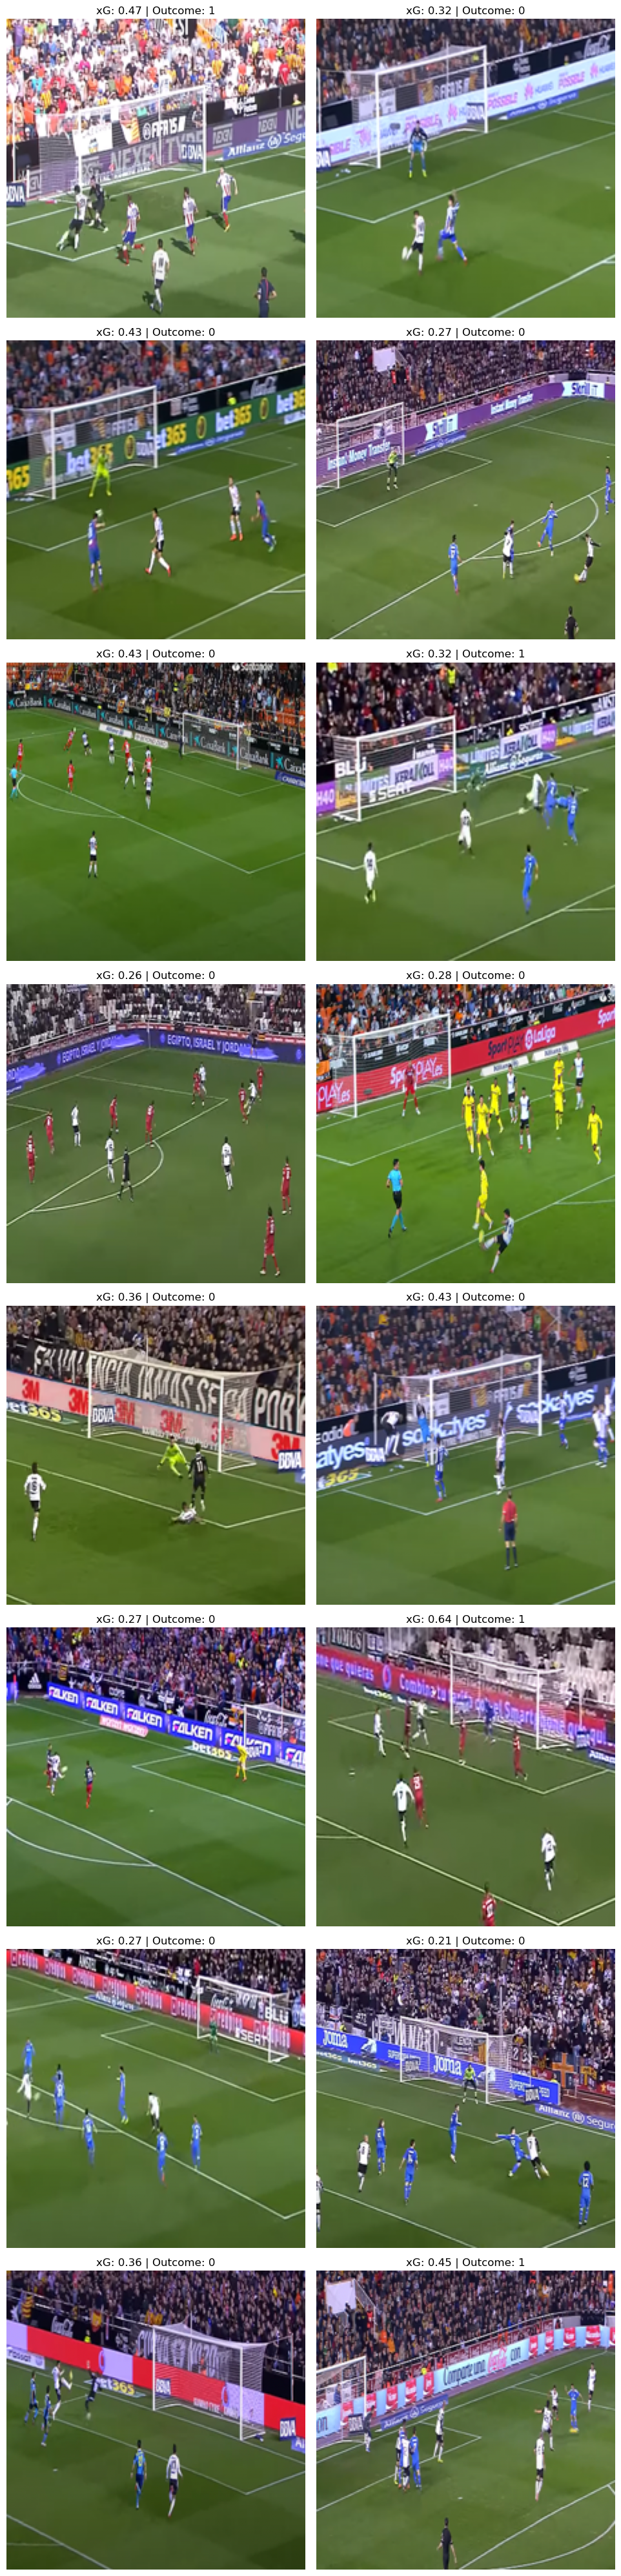

In [12]:
# Showing results for each test pic

num_images = y_test.shape[0]
num_rows = (num_images + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(X_image_test[i])
    axs[row, col].axis('off')
    axs[row, col].set_title(f"xG: {round(float(y_pred_prob[i][0]), 2)} | Outcome: {y_test[i]}")

for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Final remarks

**The results seem to be very promising, the data gathering in this case requires human work and the data is very subjective,
thus the model is dependant on the quality of this process.**